<a href="https://colab.research.google.com/github/SujinAhn21/Sujin-Ahn/blob/main/%ED%94%84%EB%A1%9C%ED%8E%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyupbit

In [ ]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute60")
df

,open,high,low,close,volume,value
2022-10-30 13:00:00,29137000.0,29170000.0,29110000.0,29161000.0,119.098400,3.470672e+09
2022-10-30 14:00:00,29168000.0,29210000.0,29151000.0,29193000.0,152.322383,4.445487e+09
2022-10-30 15:00:00,29180000.0,29321000.0,29175000.0,29317000.0,215.929735,6.321853e+09
2022-10-30 16:00:00,29315000.0,29350000.0,29191000.0,29202000.0,273.696843,8.012069e+09
2022-10-30 17:00:00,29202000.0,29224000.0,29054000.0,29111000.0,253.914895,7.399635e+09
...,...,...,...,...,...,...
2022-11-07 16:00:00,29357000.0,29357000.0,29083000.0,29100000.0,487.442627,1.422456e+10
2022-11-07 17:00:00,29100000.0,29173000.0,29029000.0,29121000.0,334.119370,9.720561e+09
2022-11-07 18:00:00,29088000.0,29143000.0,28990000.0,28991000.0,272.615055,7.921865e+09
2022-11-07 19:00:00,28990000.0,29145000.0,28981000.0,29086000.0,172.131915,5.005003e+09


In [ ]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-10-30 13:00:00,29161000.0
1,2022-10-30 14:00:00,29193000.0
2,2022-10-30 15:00:00,29317000.0
3,2022-10-30 16:00:00,29202000.0
4,2022-10-30 17:00:00,29111000.0
...,...,...
195,2022-11-07 16:00:00,29100000.0
196,2022-11-07 17:00:00,29121000.0
197,2022-11-07 18:00:00,28991000.0
198,2022-11-07 19:00:00,29086000.0


In [ ]:
!pip install pystan==2.19.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 76 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [ ]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6639438 sha256=fcd4fcb625ce0bee4ae2a6b2abdc49b3ae38eaf7afe0d20a9734f008734ca62d
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [ ]:
#prophet 불러옴
from fbprophet import Prophet

In [ ]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

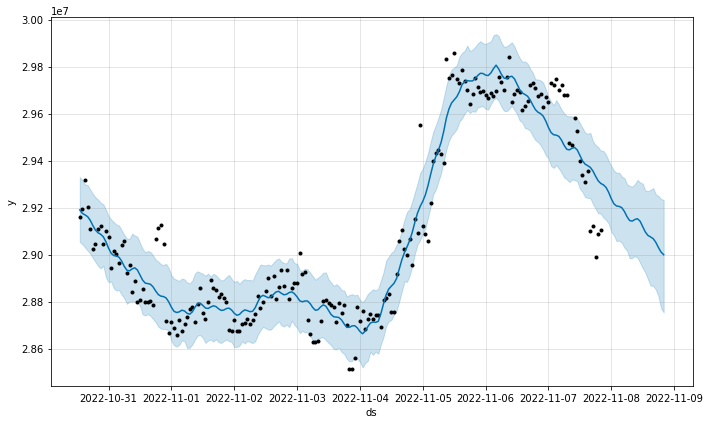

In [ ]:
#그래프1
fig1 = model.plot(forecast)

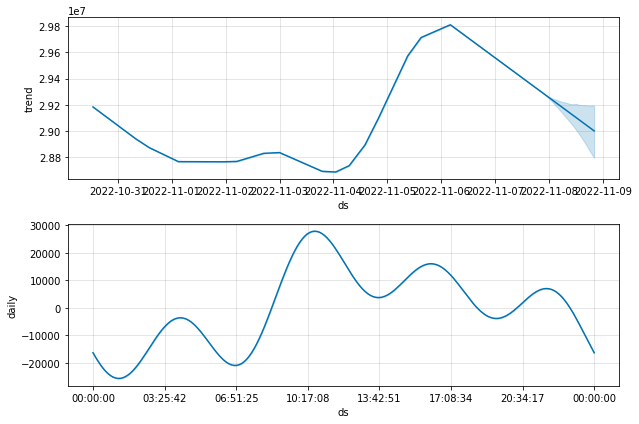

In [ ]:
#그래프2
fig2 = model.plot_components(forecast)

In [ ]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-BTC")
nowValue

29114000

In [ ]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨌든 당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

29149434.915824145

In [ ]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  29114000
종가의 가격:  29149434.915824145


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-10-30 13:00:00,2.918396e+07,2.905365e+07,2.933009e+07,2.918396e+07,2.918396e+07,6122.461089,6122.461089,6122.461089,6122.461089,6122.461089,6122.461089,0.0,0.0,0.0,2.919008e+07
1,2022-10-30 14:00:00,2.917119e+07,2.904340e+07,2.931713e+07,2.917119e+07,2.917119e+07,4269.832657,4269.832657,4269.832657,4269.832657,4269.832657,4269.832657,0.0,0.0,0.0,2.917546e+07
2,2022-10-30 15:00:00,2.915843e+07,2.903054e+07,2.929848e+07,2.915843e+07,2.915843e+07,10531.657861,10531.657861,10531.657861,10531.657861,10531.657861,10531.657861,0.0,0.0,0.0,2.916896e+07
3,2022-10-30 16:00:00,2.914566e+07,2.901690e+07,2.929589e+07,2.914566e+07,2.914566e+07,15857.449582,15857.449582,15857.449582,15857.449582,15857.449582,15857.449582,0.0,0.0,0.0,2.916152e+07
4,2022-10-30 17:00:00,2.913289e+07,2.900441e+07,2.927658e+07,2.913289e+07,2.913289e+07,12875.268956,12875.268956,12875.268956,12875.268956,12875.268956,12875.268956,0.0,0.0,0.0,2.914577e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2022-11-08 16:00:00,2.905200e+07,2.886731e+07,2.928311e+07,2.890665e+07,2.919802e+07,15857.449582,15857.449582,15857.449582,15857.449582,15857.449582,15857.449582,0.0,0.0,0.0,2.906786e+07
220,2022-11-08 17:00:00,2.903937e+07,2.885122e+07,2.925651e+07,2.887794e+07,2.919564e+07,12875.268956,12875.268956,12875.268956,12875.268956,12875.268956,12875.268956,0.0,0.0,0.0,2.905224e+07
221,2022-11-08 18:00:00,2.902674e+07,2.882212e+07,2.924955e+07,2.884899e+07,2.919454e+07,3506.821481,3506.821481,3506.821481,3506.821481,3506.821481,3506.821481,0.0,0.0,0.0,2.903024e+07
222,2022-11-08 19:00:00,2.901411e+07,2.877183e+07,2.923643e+07,2.882138e+07,2.919625e+07,-3432.115434,-3432.115434,-3432.115434,-3432.115434,-3432.115434,-3432.115434,0.0,0.0,0.0,2.901067e+07
